# Neutralization Curves for all neutralizing monoclonal antibodies from Scripps Research Institute

In [1]:
# Imports
import os
import warnings
import neutcurve
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

# seaborn style settings
sns.set(rc={"figure.dpi":300, "savefig.dpi":300})
sns.set_style("ticks")

In [2]:
# Read data
df = pd.read_excel("data/fraction_infected.xlsx")
df.head()

,serum,virus,replicate,concentration,fraction infectivity
0,S437.8,LASV,1,20.00000,0.002754
1,S437.8,LASV,1,5.00000,0.026221
2,S437.8,LASV,1,1.25000,0.245317
3,S437.8,LASV,1,0.31250,0.528223
4,S437.8,LASV,1,0.07812,0.702997


In [3]:
# Drop VSVG
df = df.loc[df["virus"] != "VSVG"]

df.head()

,serum,virus,replicate,concentration,fraction infectivity
0,S437.8,LASV,1,20.00000,0.002754
1,S437.8,LASV,1,5.00000,0.026221
2,S437.8,LASV,1,1.25000,0.245317
3,S437.8,LASV,1,0.31250,0.528223
4,S437.8,LASV,1,0.07812,0.702997


In [4]:
# Supress fitting warnings
warnings.simplefilter("ignore")

# Fit hill curves using neutcurve
fits = neutcurve.curvefits.CurveFits(
    data=df,
    fixbottom=0,
    fixtop=1,
)

# IC values to calculate
fitParams = fits.fitParams(ics=[50, 80, 90, 95, 97, 98, 99])
# Show calculated values
display(fitParams)

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic80,ic80_bound,ic80_str,...,ic98,ic98_bound,ic98_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,S437.8,LASV,average,2,0.263412,interpolated,0.263,1.580297,interpolated,1.58,...,20.000000,lower,>20,20.000000,lower,>20,0.263412,0.773754,1,0
1,S437.11,LASV,average,2,0.016625,interpolated,0.0166,0.094745,interpolated,0.0947,...,2.200614,interpolated,2.2,5.320787,interpolated,5.32,0.016625,0.796593,1,0
2,S437.27,LASV,average,2,0.698560,interpolated,0.699,3.956259,interpolated,3.96,...,20.000000,lower,>20,20.000000,lower,>20,0.698560,0.799462,1,0
3,S437.42,LASV,average,2,1.420879,interpolated,1.42,6.849460,interpolated,6.85,...,20.000000,lower,>20,20.000000,lower,>20,1.420879,0.881366,1,0
4,S444.28,LASV,average,2,0.987078,interpolated,0.987,4.919094,interpolated,4.92,...,20.000000,lower,>20,20.000000,lower,>20,0.987078,0.863127,1,0
5,S444.33,LASV,average,2,0.040931,interpolated,0.0409,0.154645,interpolated,0.155,...,1.708792,interpolated,1.71,3.353957,interpolated,3.35,0.040931,1.042923,1,0
6,S444.46,LASV,average,2,0.017566,interpolated,0.0176,0.050198,interpolated,0.0502,...,0.334876,interpolated,0.335,0.570473,interpolated,0.57,0.017566,1.320241,1,0
7,S444.78,LASV,average,2,1.344326,interpolated,1.34,7.255869,interpolated,7.26,...,20.000000,lower,>20,20.000000,lower,>20,1.344326,0.822279,1,0
8,S437.20,LASV,average,2,0.055060,interpolated,0.0551,0.200265,interpolated,0.2,...,2.065928,interpolated,2.07,3.977466,interpolated,3.98,0.055060,1.073632,1,0


## Summary of IC values

In [5]:
# Show calculated IC values
display(fitParams[fitParams["serum"]=="S437.8"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S437.11"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S437.20"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S437.27"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S437.42"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S444.28"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S444.33"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S444.46"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])
display(fitParams[fitParams["serum"]=="S444.78"][["serum","virus","ic50", "ic80", "ic90", "ic95", "ic97", "ic98", "ic99"]])

,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
0,S437.8,LASV,0.263412,1.580297,4.507124,11.838529,20.0,20.0,20.0


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
1,S437.11,LASV,0.016625,0.094745,0.262221,0.669948,1.30586,2.200614,5.320787


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
8,S437.20,LASV,0.05506,0.200265,0.426221,0.854851,1.402658,2.065928,3.977466


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
2,S437.27,LASV,0.69856,3.956259,10.9096,20.0,20.0,20.0,20.0


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
3,S437.42,LASV,1.420879,6.84946,17.188727,20.0,20.0,20.0,20.0


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
4,S444.28,LASV,0.987078,4.919094,12.586825,20.0,20.0,20.0,20.0


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
5,S444.33,LASV,0.040931,0.154645,0.33653,0.688938,1.147028,1.708792,3.353957


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
6,S444.46,LASV,0.017566,0.050198,0.092778,0.163396,0.244417,0.334876,0.570473


,serum,virus,ic50,ic80,ic90,ic95,ic97,ic98,ic99
7,S444.78,LASV,1.344326,7.255869,19.453156,20.0,20.0,20.0,20.0


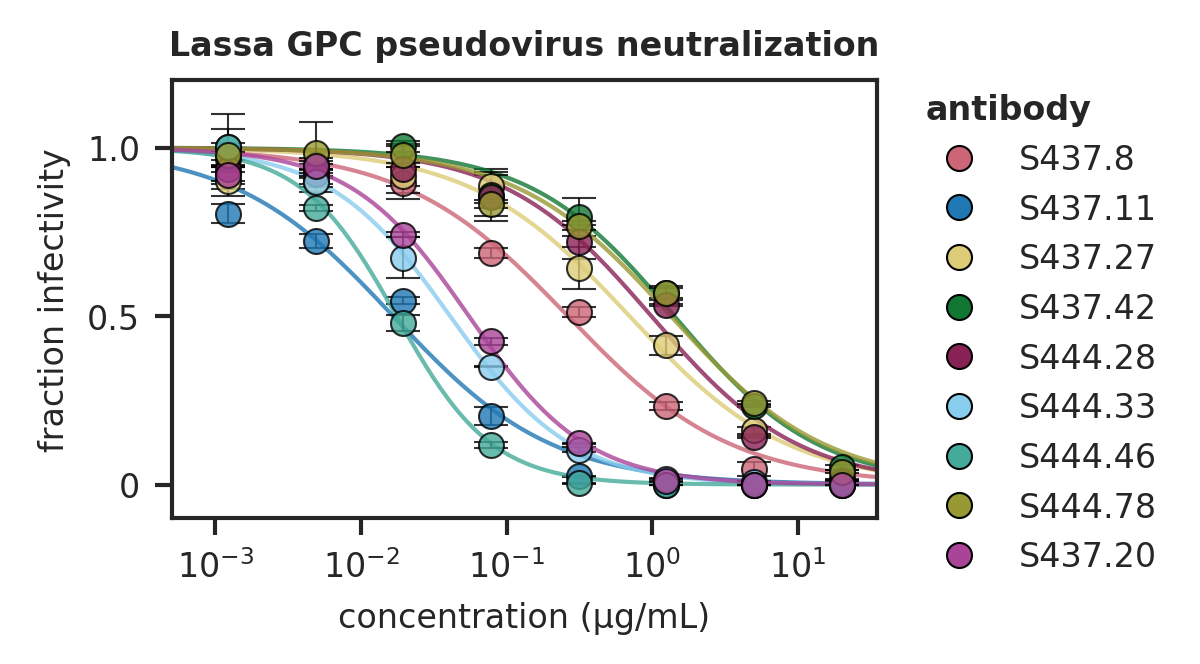

In [6]:
# Plotting colors
tol_muted_adjusted = [
    #"#000000",
    "#CC6677", 
    "#1f78b4", 
    "#DDCC77", 
    "#117733", 
    "#882255", 
    "#88CCEE",
    "#44AA99", 
    "#999933", 
    "#AA4499", 
    "#EE7733",
    "#CC3311",
    "#DDDDDD",
]

# Markers
markers = [
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
    "o",
]

fig, axes = fits.plotViruses(
    colors=tol_muted_adjusted,
    markers=markers,
    xlabel="",
    ylabel="",
    attempt_shared_legend=False,
    max_sera_per_subplot=9,
)
axes[0,0].set_title(
    "Lassa GPC pseudovirus neutralization", 
    weight="bold",
    fontsize=8,
)
axes[0,0].set_xlabel(
    "concentration (\u03BCg/mL)", 
    fontsize=8,
    # weight="bold",
)
axes[0,0].set_ylabel(
    "fraction infectivity", 
    fontsize=8,
    # weight="bold",
)
axes[0,0].set_ylim(-0.1, 1.2)
axes[0,0].set_yticks([0, 0.5, 1.0])
axes[0,0].set_yticklabels(labels=[0, 0.5, 1.0], fontsize=8)
axes[0,0].set_xlim(0.0005, 35)
axes[0,0].set_xticks([0.001, 0.01, 0.1, 1, 10])
axes[0,0].set_xticklabels(labels=["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^0$", "$10^1$"], fontsize=8)
sns.move_legend(
    axes[0,0], 
    bbox_to_anchor=(1.05, 1), 
    loc="upper left",
    borderaxespad=0,
    frameon=False,
    fontsize=8,
    title="antibody",
    title_fontproperties={"weight" : "bold", "size" : 8},
    alignment="left"
)

plt.setp(axes[0,0].collections, alpha=0.8, linewidths=0.5, colors="black") # for vertical error bar segment
plt.setp(axes[0,0].lines, alpha=0.8, markeredgewidth=0.5, markeredgecolor="black", linewidth=1) # for the lines and markers

# Add edges to legend markers to match scatter plot
for ha in axes[0,0].legend_.legend_handles:
    ha.set_markeredgecolor("black")
    ha.set_markeredgewidth(0.5)
    ha.set_linewidth(0)
    
# Change all spines
for axis in ["top", "bottom", "left", "right"]:
    axes[0,0].spines[axis].set_linewidth(1)
axes[0,0].tick_params(axis="both", length=4, width=1)

width = 3
height = 2
fig.set_size_inches(width, height)

# Make output dir if doesn't exist
if not os.path.exists("results/"):
    os.mkdir("results/")
        
plt.savefig(
    "results/monoclonal_antibody_neut_curves.svg",
)